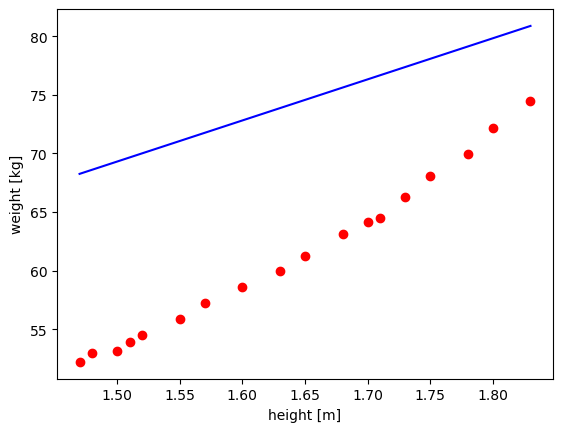

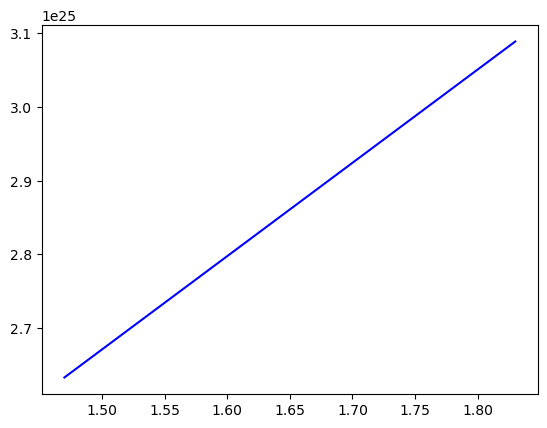

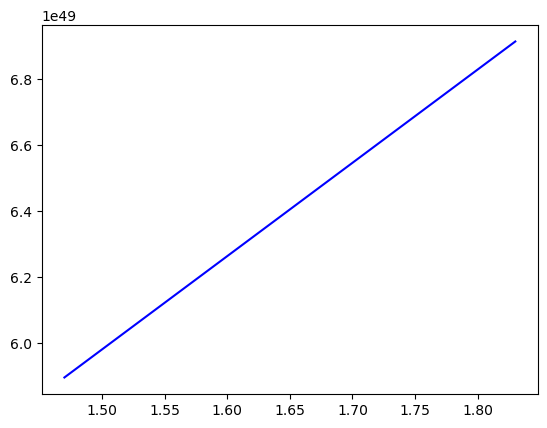

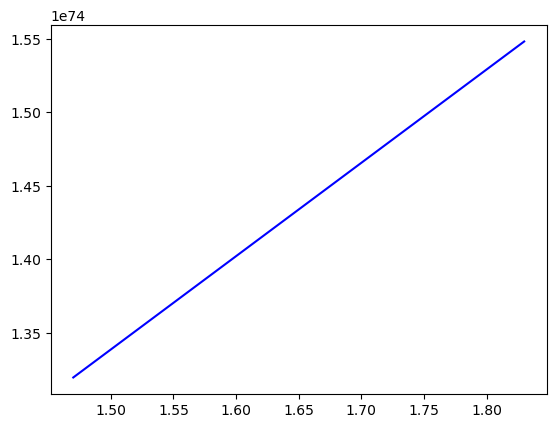

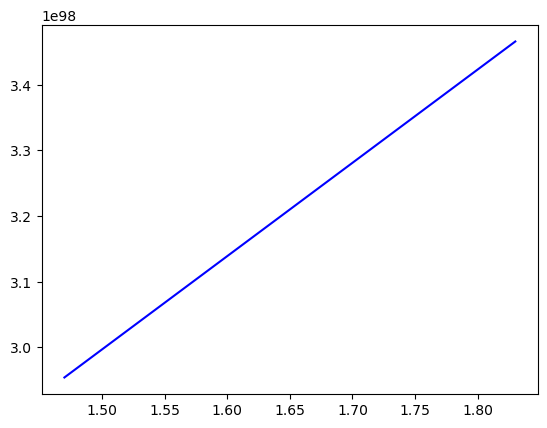

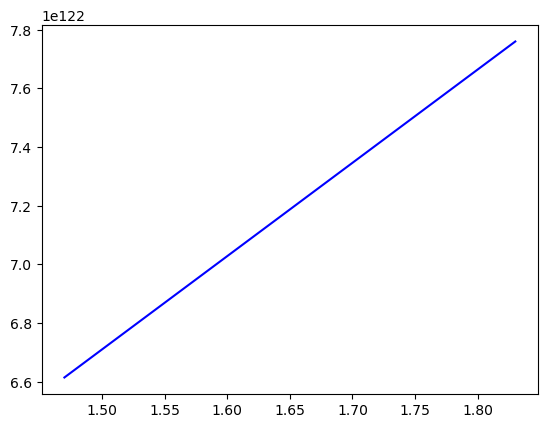

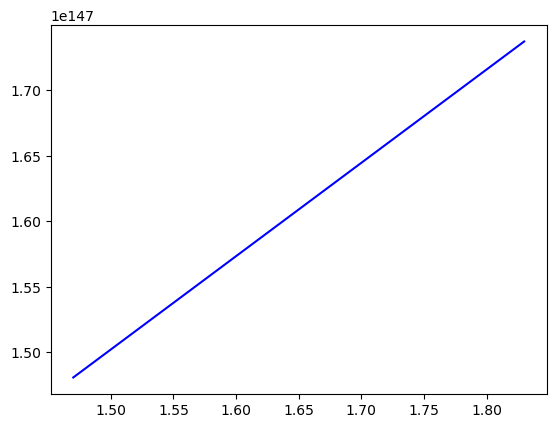

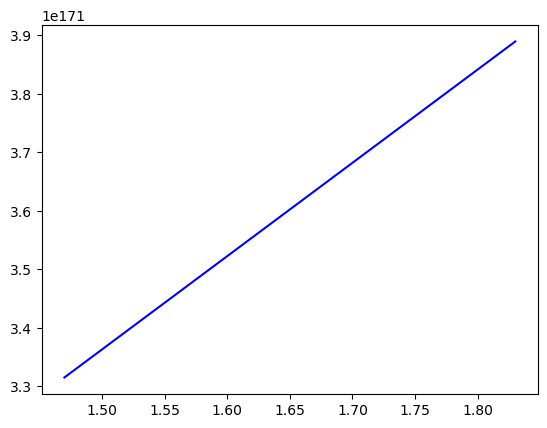

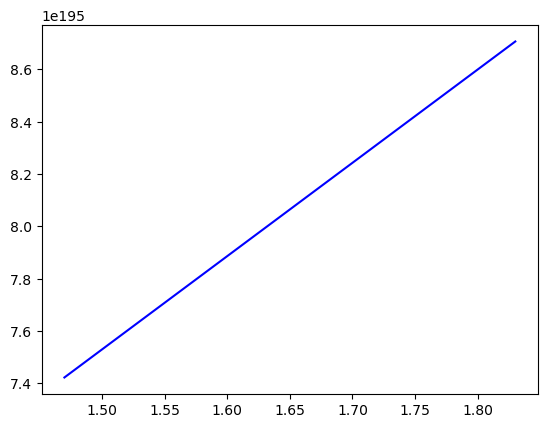

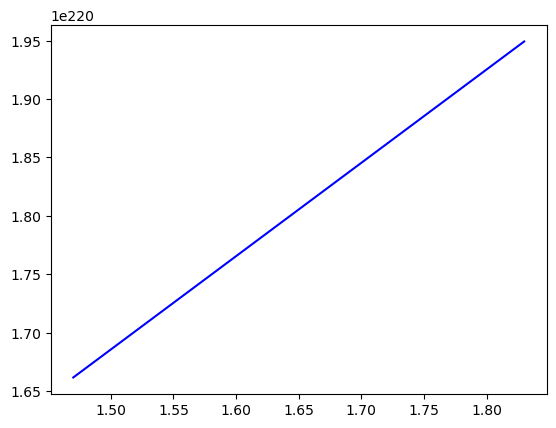

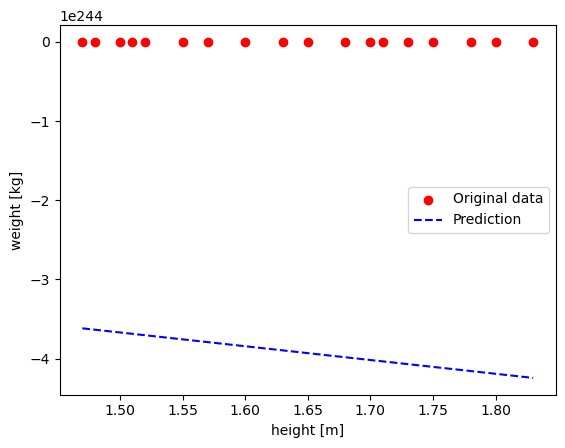

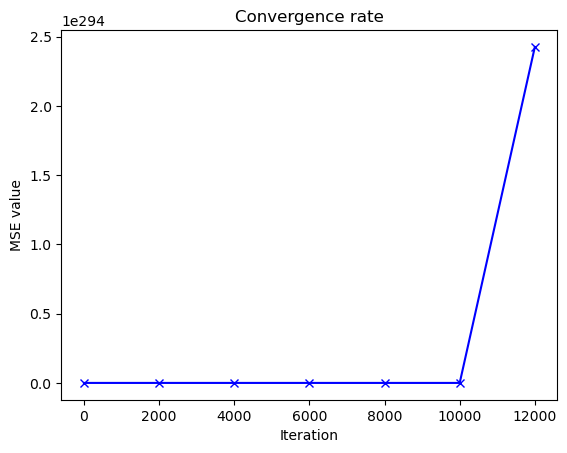

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

# Initialize function to reset model parameters
def reset(): 
    x1 = tf.Variable(np.random.normal(24, 0.1, 1)) 
    x2 = tf.Variable(np.random.normal(10, 0.1, 1)) 
    return x1, x2

# Input data of person height and weight
heights = np.array([1.47, 1.48, 1.5, 1.51, 1.52, 1.55, 1.57, 1.6, 1.63, 1.65, 1.68, 1.7, 1.71, 1.73, 1.75, 1.78, 1.8, 1.83])
weights = np.array([52.21, 52.99, 53.12, 53.88, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.12, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])
plt.figure(1) # display input data using scatter plot
plt.scatter(heights, weights, color='red', label='Original data')
plt.xlabel('height [m]'), plt.ylabel('weight [kg]')

tf_slope, tf_icept = reset() # Initialize model parameters
learning_rate = 0.275         # Set the learning rate
mse = []; Niter = []         # Initialize empty cost function and number of iteration
Nmax = 20000                 # Maximum number of iteration
epsilon = 1e-5               # threshold value for stopping criteria

# Perform gradient descent for each n+1 iteration
for i in range(Nmax):
    # Using "GradientTape" to compute gradients for each iteration
    with tf.GradientTape() as tape:
        # Computing the Cost function
        predictions = tf_slope * heights + tf_icept # linear straight-line prediction
        errors = weights - predictions  # error = prediction - true
        loss = tf.reduce_mean(errors**2) # minimizing the mean-square error

    # Auto-diff for calculating gradients between loss function and parameters
    dloss_dparams = tape.gradient(loss, [tf_slope, tf_icept])
    
    # Updating parameters according to Gradients descend direction
    tf_slope.assign(tf_slope - learning_rate * dloss_dparams[0].numpy())
    tf_icept.assign(tf_icept - learning_rate * dloss_dparams[1].numpy())
    
    if i % 2000 == 0: # plot mse function for every 2000 iterations
        w = (tf_slope * heights) + tf_icept
        mse.append(loss)
        Niter.append(i)
        plt.plot(heights, w, color='blue', label='Prediction')
        plt.pause(0.2)
    
    if (abs(dloss_dparams[0]) < epsilon) or (abs(dloss_dparams[1]) < epsilon):
        break

plt.show()

plt.figure(1)
plt.scatter(heights, weights, color='red', label='Original data')
w = (tf_slope * heights) + tf_icept
plt.plot(heights, w, 'b--', label='Prediction')
plt.legend()
plt.xlabel('height [m]'), plt.ylabel('weight [kg]')

plt.figure(2)
plt.plot(Niter, mse, 'bx-')
plt.title('Convergence rate')
plt.xlabel('Iteration'), plt.ylabel('MSE value')
plt.show()
